# Business Problem

**A mobile phone is available in multiple variants based on features such as brand, color options, internal storage (ROM), and price.
Even within the same brand and similar specifications, phone prices vary significantly due to these factors.**

Customers often get confused while choosing a smartphone because it is not clear

+ Whether brand alone increases the phone price

+ If higher ROM variants justify a higher cost

+ Which brand offers better value at the same price level

+ Due to this uncertainty, customers struggle to identify smartphones that provide the best value for money.



# Business Problem Statement

+ Smartphone prices vary widely based on features such as brand, internal storage (ROM), and color variants, making it difficult for customers to understand the true reasons behind price differences.
  
+ There is a need to analyze mobile phone data to determine how these features influence pricing and to identify patterns that help customers compare phones more effectively.

+ Using the given dataset, an analytical approach is required to study the relationship between price, brand, ROM, and color, and to highlight which combinations offer the best value to consumers.

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
options = Options()
options.add_argument("--start-maximized")
options.add_argument("--disable-blink-features=AutomationControlled")

driver = webdriver.Chrome(
    service=Service(ChromeDriverManager().install()),
    options=options
)

In [3]:
driver.get('https://www.shopsy.in/')

In [4]:
search=driver.find_element(By.XPATH,'//*[@id="__next"]/div[1]/div[1]/div/div[1]/div/div[1]/div/div/input')
search.send_keys('Smart Mobiles')

In [5]:
search.send_keys(Keys.RETURN)

In [6]:
a=driver.find_elements(By.CSS_SELECTOR,'.sc-c50e187b-0.bkNEtl')
a

[<selenium.webdriver.remote.webelement.WebElement (session="5533d09a9c459285ad9b6d04f73d0694", element="f.CE62413F458AC2C3D12F0376900C606C.d.489F1E88EA472D9D943D9226CFAA63C5.e.28")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5533d09a9c459285ad9b6d04f73d0694", element="f.CE62413F458AC2C3D12F0376900C606C.d.489F1E88EA472D9D943D9226CFAA63C5.e.29")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5533d09a9c459285ad9b6d04f73d0694", element="f.CE62413F458AC2C3D12F0376900C606C.d.489F1E88EA472D9D943D9226CFAA63C5.e.30")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5533d09a9c459285ad9b6d04f73d0694", element="f.CE62413F458AC2C3D12F0376900C606C.d.489F1E88EA472D9D943D9226CFAA63C5.e.31")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5533d09a9c459285ad9b6d04f73d0694", element="f.CE62413F458AC2C3D12F0376900C606C.d.489F1E88EA472D9D943D9226CFAA63C5.e.32")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5533d09a9c459285ad9b6d04f

In [7]:
driver.find_elements(By.CSS_SELECTOR,'.sc-c50e187b-0.bkNEtl')[1].text

'Realme Narzo 80 Lite 5G (Onyx Black, 128 GB)'

In [8]:
import re

In [9]:
import re
import numpy as np
Mobile_Name = []
elements = driver.find_elements(By.CSS_SELECTOR, '.sc-c50e187b-0.bkNEtl')
for i in elements:
    text = i.text
    a = re.findall(r'(.+?)\s*\(', text)
    if a:
        Mobile_Name.append(a[0].strip())
    else:
        Mobile_Name.append(np.nan)
print(Mobile_Name)


[nan, 'Realme Narzo 80 Lite 5G', 'REDMI A4', 'Redmi A4', 'realme Narzo 80 Lite 4G', 'IQOO Z10 Lite 5G', 'IQOO Z10 Lite 5G', 'IQOO Z10 Lite 5G', 'IQOO Z10 Lite 5G', nan, 'IQOO Z10X 5G', 'IQOO Z10X 5G', 'Redmi 14C 5G', 'ONEPLUS 13R 5G', 'redmi 13 5G', 'redmi 13 5G', 'ringme BOLD P70', 'ringme BOLD P70', 'REDMI 13 5G', 'Lava Shark 5G', 'Lava Shark 5G', 'SAMSUNG M06 5G', 'hmd Crest 5G', 'HMD Crest 5G']


In [10]:


Color = []

elements = driver.find_elements(By.CSS_SELECTOR, '.sc-c50e187b-0.bkNEtl')
for i in elements:
    text = i.text
    a = re.findall(r'\(([^,]+),', text)
    if a:
        Color.append(a[0].strip())
    else:
        Color.append(np.nan)

print(Color)


[nan, 'Onyx Black', 'Sparkle Purple', 'Starry Black', 'Beach Gold', 'Cyber Green', 'Cyber Green', 'Titanium Blue', 'Titanium Blue', nan, 'Titanium', 'Ultramarine', 'Stargaze Black', 'Nebula Noir', 'Black Diamond', 'Hawaiian Blue', 'Blue', 'Golden', 'Orchid Pink', 'stellar gold /steller gold', 'stellar blue/ steller blue', 'Blazing Black', 'Midnight Blue', 'Midnight Blue']


In [28]:
Brand = []

for i in driver.find_elements(By.CSS_SELECTOR, '.sc-c50e187b-0.bkNEtl'):
    text = i.text
    a = re.findall(r'(\w+).+', text)

    if a:
        Brand.append(a[0])
    else:
        Brand.append(np.nan)

print(Brand)

['Redmi', 'Realme', 'realme', 'redmi', 'redmi', 'Micromax', 'IQOO', 'IQOO', 'IQOO', 'IQOO', 'REDMI', 'Redmi', 'IQOO', 'IQOO', 'Lava', 'Micromax', 'HMD', 'ringme', 'ringme', 'REDMI', 'ONEPLUS', 'Lava', 'hmd', 'SIA']


In [12]:
import re
import numpy as np

ROM = []

elements = driver.find_elements(By.CSS_SELECTOR, '.sc-c50e187b-0.bkNEtl')
for i in elements:
    text = i.text
    a = re.findall(r',\s*(\d+)', text)
    if a:
        ROM.append(a[0])   # or int(a[0]) if you want numeric
    else:
        ROM.append(np.nan)

print(ROM)


[nan, '128', '64', '64', '128', '128', '128', '128', '128', nan, '128', '128', '128', '256', '128', '128', '128', '128', '128', '64', '64', '128', '128', '128']


In [13]:
a=driver.find_elements(By.CSS_SELECTOR,'.css-146c3p1.r-1h7g6bg.r-1vgyyaa.r-1rsjblm.r-142tt33.r-11wrixw')
a

[<selenium.webdriver.remote.webelement.WebElement (session="5533d09a9c459285ad9b6d04f73d0694", element="f.CE62413F458AC2C3D12F0376900C606C.d.489F1E88EA472D9D943D9226CFAA63C5.e.54")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5533d09a9c459285ad9b6d04f73d0694", element="f.CE62413F458AC2C3D12F0376900C606C.d.489F1E88EA472D9D943D9226CFAA63C5.e.55")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5533d09a9c459285ad9b6d04f73d0694", element="f.CE62413F458AC2C3D12F0376900C606C.d.489F1E88EA472D9D943D9226CFAA63C5.e.56")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5533d09a9c459285ad9b6d04f73d0694", element="f.CE62413F458AC2C3D12F0376900C606C.d.489F1E88EA472D9D943D9226CFAA63C5.e.57")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5533d09a9c459285ad9b6d04f73d0694", element="f.CE62413F458AC2C3D12F0376900C606C.d.489F1E88EA472D9D943D9226CFAA63C5.e.58")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5533d09a9c459285ad9b6d04f

In [14]:
driver.find_elements(By.CSS_SELECTOR,'.css-146c3p1.r-1h7g6bg.r-1vgyyaa.r-1rsjblm.r-142tt33.r-11wrixw')[1].text

'14,999'

In [15]:
import numpy as np

MRP_Price = []

elements = driver.find_elements(
    By.CSS_SELECTOR,
    '.css-146c3p1.r-1h7g6bg.r-1vgyyaa.r-1rsjblm.r-142tt33.r-11wrixw')
for i in elements:
    text = i.text.strip()

    if text:
        MRP_Price.append(text)
    else:
        MRP_Price.append(np.nan)

print(MRP_Price)


['1,799', '14,999', '10,999', '10,999', '10,999', '14,999', '13,999', '14,999', '13,999', '1,899', '17,499', '17,499', '14,999', '44,999', '17,999', '17,999', '9,999', '9,999', '17,999', '10,999', '10,999', '15,499', '18,999', '18,999']


In [16]:
a=driver.find_elements(By.CSS_SELECTOR,'.css-146c3p1.r-cqee49.r-1vgyyaa.r-1rsjblm.r-13hce6t')
a

[<selenium.webdriver.remote.webelement.WebElement (session="5533d09a9c459285ad9b6d04f73d0694", element="f.CE62413F458AC2C3D12F0376900C606C.d.489F1E88EA472D9D943D9226CFAA63C5.e.78")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5533d09a9c459285ad9b6d04f73d0694", element="f.CE62413F458AC2C3D12F0376900C606C.d.489F1E88EA472D9D943D9226CFAA63C5.e.79")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5533d09a9c459285ad9b6d04f73d0694", element="f.CE62413F458AC2C3D12F0376900C606C.d.489F1E88EA472D9D943D9226CFAA63C5.e.80")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5533d09a9c459285ad9b6d04f73d0694", element="f.CE62413F458AC2C3D12F0376900C606C.d.489F1E88EA472D9D943D9226CFAA63C5.e.81")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5533d09a9c459285ad9b6d04f73d0694", element="f.CE62413F458AC2C3D12F0376900C606C.d.489F1E88EA472D9D943D9226CFAA63C5.e.82")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5533d09a9c459285ad9b6d04f

In [17]:
driver.find_elements(By.CSS_SELECTOR,'.css-146c3p1.r-cqee49.r-1vgyyaa.r-1rsjblm.r-13hce6t')[0].text

'₹934'

In [18]:
import re
import numpy as np

Selling_Price = []

elements = driver.find_elements(By.CSS_SELECTOR,'.css-146c3p1.r-cqee49.r-1vgyyaa.r-1rsjblm.r-13hce6t')
for i in elements:
    text = i.text.strip()
    a = re.findall(r'₹([\d,]+)', text)
    if a:
        price = int(a[0].replace(',', ''))
        Selling_Price.append(price)
    else:
        Selling_Price.append(np.nan)

print(Selling_Price)


[934, 11875, 8784, 8784, 8284, 12601, 11602, 12601, 11602, 924, 14604, 14604, 10824, 37984, 12984, 13180, 5785, 5685, 13180, 9085, 8617, 11175, 10484, 9620]


In [19]:
a=driver.find_elements(By.CSS_SELECTOR,'.css-146c3p1.r-183gjk9.r-1vgyyaa.r-1rsjblm.r-11wrixw')
a

[<selenium.webdriver.remote.webelement.WebElement (session="5533d09a9c459285ad9b6d04f73d0694", element="f.CE62413F458AC2C3D12F0376900C606C.d.489F1E88EA472D9D943D9226CFAA63C5.e.102")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5533d09a9c459285ad9b6d04f73d0694", element="f.CE62413F458AC2C3D12F0376900C606C.d.489F1E88EA472D9D943D9226CFAA63C5.e.103")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5533d09a9c459285ad9b6d04f73d0694", element="f.CE62413F458AC2C3D12F0376900C606C.d.489F1E88EA472D9D943D9226CFAA63C5.e.104")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5533d09a9c459285ad9b6d04f73d0694", element="f.CE62413F458AC2C3D12F0376900C606C.d.489F1E88EA472D9D943D9226CFAA63C5.e.105")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5533d09a9c459285ad9b6d04f73d0694", element="f.CE62413F458AC2C3D12F0376900C606C.d.489F1E88EA472D9D943D9226CFAA63C5.e.106")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5533d09a9c459285ad9b

In [20]:
driver.find_elements(By.CSS_SELECTOR,'.css-146c3p1.r-183gjk9.r-1vgyyaa.r-1rsjblm.r-11wrixw')[0].text

'48% off'

In [21]:
Discount=[]
for i in driver.find_elements(By.CSS_SELECTOR,'.css-146c3p1.r-183gjk9.r-1vgyyaa.r-1rsjblm.r-11wrixw'):
    text=i.text
    a=re.findall(r'(\d+)\%.+',text)
    Discount.extend(a)
print(Discount)

['48', '20', '20', '20', '24', '15', '17', '15', '17', '51', '16', '16', '27', '15', '27', '26', '42', '43', '26', '17', '21', '27', '44', '49']


In [79]:
import re
import numpy as np

Mobile_Name = []
Color = []
Brand = []
ROM = []
MRP_Price = []
Selling_Price = []
Discount = []

for page in range(1,41):
    url = f'https://www.shopsy.in/search?q=Smart+Mobiles&as=on&as-show=on&page={page}'
    driver.get(url)

    # -------- Mobile Name --------
    elements = driver.find_elements(By.CSS_SELECTOR, '.sc-c50e187b-0.bkNEtl')
    for el in elements:
        text = el.text
        a = re.findall(r'(.+?)\s*\(', text)
        if a:
            Mobile_Name.append(a[0].strip())
        else:
            Mobile_Name.append(np.nan)

    # -------- Color --------
    elements = driver.find_elements(By.CSS_SELECTOR, '.sc-c50e187b-0.bkNEtl')
    for el in elements:
        text = el.text
        a = re.findall(r'\(([^,]+),', text)
        if a:
            Color.append(a[0].strip())
        else:
            Brand.append(np.nan)
    # --------Brand------------

    for i in driver.find_elements(By.CSS_SELECTOR,'.sc-c50e187b-0.bkNEtl'):
        text=i.text
        a=re.findall(r'(\w+).+',text)
        Brand.extend(a)

    # -------- ROM --------
    elements = driver.find_elements(By.CSS_SELECTOR, '.sc-c50e187b-0.bkNEtl')
    for el in elements:
        text = el.text
        a = re.findall(r',\s*(\d+)', text)
        if a:
            ROM.append(a[0])
        else:
            ROM.append(np.nan)

    # -------- MRP Price --------
    elements = driver.find_elements(
        By.CSS_SELECTOR,
        '.css-146c3p1.r-1h7g6bg.r-1vgyyaa.r-1rsjblm.r-142tt33.r-11wrixw'
    )
    for el in elements:
        text = el.text.strip()
        if text:
            MRP_Price.append(text)
        else:
            MRP_Price.append(np.nan)

    # -------- Selling Price --------
    elements = driver.find_elements(
        By.CSS_SELECTOR,
        '.css-146c3p1.r-cqee49.r-1vgyyaa.r-1rsjblm.r-13hce6t'
    )
    for el in elements:
        text = el.text.strip()
        a = re.findall(r'₹([\d,]+)', text)
        if a:
            price = int(a[0].replace(',', ''))
            Selling_Price.append(price)
        else:
            Selling_Price.append(np.nan)

    # -------- Discount --------
    elements = driver.find_elements(
        By.CSS_SELECTOR,
        '.css-146c3p1.r-183gjk9.r-1vgyyaa.r-1rsjblm.r-11wrixw'
    )
    for el in elements:
        text = el.text
        a = re.findall(r'(\d+)\%', text)
        if a:
            Discount.append(a[0])
        else:
            Discount.append(np.nan)

    print(f'page {page} scraped')


page 1 scraped
page 2 scraped
page 3 scraped
page 4 scraped
page 5 scraped
page 6 scraped
page 7 scraped
page 8 scraped
page 9 scraped
page 10 scraped
page 11 scraped
page 12 scraped
page 13 scraped
page 14 scraped
page 15 scraped
page 16 scraped
page 17 scraped
page 18 scraped
page 19 scraped
page 20 scraped
page 21 scraped
page 22 scraped
page 23 scraped
page 24 scraped
page 25 scraped
page 26 scraped
page 27 scraped
page 28 scraped
page 29 scraped
page 30 scraped
page 31 scraped
page 32 scraped
page 33 scraped
page 34 scraped
page 35 scraped
page 36 scraped
page 37 scraped
page 38 scraped
page 39 scraped
page 40 scraped


In [80]:
print(Mobile_Name,Color,ROM,MRP_Price,Selling_Price,Discount)

['Redmi 14C 5G', 'Realme Narzo 80 Lite 5G', 'realme Narzo 80 Lite 4G', 'redmi 13 5G', 'redmi 13 5G', nan, 'IQOO Z10 Lite 5G', 'IQOO Z10 Lite 5G', 'IQOO Z10 Lite 5G', 'IQOO Z10 Lite 5G', 'REDMI A4', 'Redmi A4', 'IQOO Z10X 5G', 'IQOO Z10X 5G', 'Lava Shark 5G', nan, 'HMD Crest 5G', 'ringme BOLD P70', 'ringme BOLD P70', 'REDMI 13 5G', 'ONEPLUS 13R 5G', 'Lava Shark 5G', 'hmd Crest 5G', 'realme Narzo 50', 'realme Narzo 50', nan, 'SAMSUNG M06 5G', nan, 'MOTOROLA g57 power 5G', 'POCO C75 5G', 'vivo T4 Lite 5G Charger in the Box', 'vivo T4 Lite 5G Charger in the Box', 'vivo T4 Lite 5G Charger in the Box', 'realme P4x 5G', 'realme P4x 5G', 'realme P4x 5G', 'realme P4x 5G', 'realme P4x 5G', 'realme P4x 5G', 'vivo T4 Lite 5G Charger in the Box', 'MOTOROLA Edge 60 Fusion 5G', 'MOTOROLA g57 power 5G', 'MOTOROLA Edge 60 Fusion 5G', 'realme P4x 5G', 'realme P4x 5G', 'POCO C75 5G', 'Apple iPhone 16', 'Google Pixel 9A', 'MOTOROLA G96 5G', 'MOTOROLA g57 power 5G', 'Google Pixel 9A', 'vivo T4x 5G', 'vivo 

In [81]:
from itertools import zip_longest

In [82]:
data=list(zip(Mobile_Name,Color,Brand,ROM,MRP_Price,Selling_Price,Discount))


In [83]:
data

[('Redmi 14C 5G', 'Stargaze Black', nan, '128', '14,999', 10824, '27'),
 ('Realme Narzo 80 Lite 5G', 'Onyx Black', nan, '128', '14,999', 11875, '20'),
 ('realme Narzo 80 Lite 4G',
  'Beach Gold',
  'Redmi',
  '128',
  '10,999',
  8284,
  '24'),
 ('redmi 13 5G', 'Hawaiian Blue', 'Realme', '128', '17,999', 13180, '26'),
 ('redmi 13 5G', 'Black Diamond', 'realme', '128', '17,999', 12984, '27'),
 (nan, 'Cyber Green', 'redmi', nan, '1,799', 934, '48'),
 ('IQOO Z10 Lite 5G', 'Cyber Green', 'redmi', '128', '14,999', 12601, '15'),
 ('IQOO Z10 Lite 5G',
  'Titanium Blue',
  'Micromax',
  '128',
  '13,999',
  11602,
  '17'),
 ('IQOO Z10 Lite 5G', 'Titanium Blue', 'IQOO', '128', '14,999', 12601, '15'),
 ('IQOO Z10 Lite 5G', 'Sparkle Purple', 'IQOO', '128', '13,999', 11602, '17'),
 ('REDMI A4', 'Starry Black', 'IQOO', '64', '10,999', 8784, '20'),
 ('Redmi A4', 'Titanium', 'IQOO', '64', '10,999', 8784, '20'),
 ('IQOO Z10X 5G', 'Ultramarine', 'REDMI', '128', '17,499', 14604, '16'),
 ('IQOO Z10X 5G',

In [1]:
import pandas as pd

In [2]:
df=pd.DataFrame(data,columns=['Mobile_Name','Color','Brand','ROM','MRP_Price','Selling_Price','Discount'])

NameError: name 'data' is not defined

In [ ]:
df

In [258]:
df.to_csv(r'Mobile Scraped Dataset.csv')

In [124]:
import pandas as pd

In [125]:
df=pd.read_csv(r"C:\Users\sameer\Downloads\Mobile Scraped Dataset.csv")

In [126]:
df

,Unnamed: 0,Mobile_Name,Color,Brand,ROM,MRP_Price,Selling_Price,Discount
0,0,Redmi 14C 5G,Stargaze Black,NaN,128.0,"14,999",10824,27
1,1,Realme Narzo 80 Lite 5G,Onyx Black,NaN,128.0,"14,999",11875,20
2,2,realme Narzo 80 Lite 4G,Beach Gold,Redmi,128.0,"10,999",8284,24
3,3,redmi 13 5G,Hawaiian Blue,Realme,128.0,"17,999",13180,26
4,4,redmi 13 5G,Black Diamond,realme,128.0,"17,999",12984,27
...,...,...,...,...,...,...,...,...
704,704,IQOO Z10R 5G,Black Diamond,POCO,256.0,"48,999",37999,15
705,705,Tecno Spark 30C 5G,Hawaiian Blue,REDMI,128.0,"19,999",13800,23
706,706,Tecno Pova 7 Pro 5G,stellar gold /steller gold,realme,256.0,"38,999",37695,19
707,707,realme Gt 7,stellar blue/ steller blue,vivo,512.0,"22,999",16999,5


In [127]:
df.shape

(709, 8)

In [128]:
df.size

5672

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     709 non-null    int64  
 1   Mobile_Name    683 non-null    object 
 2   Color          709 non-null    object 
 3   Brand          683 non-null    object 
 4   ROM            683 non-null    float64
 5   MRP_Price      709 non-null    object 
 6   Selling_Price  709 non-null    int64  
 7   Discount       709 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 44.4+ KB


In [130]:
df.isna().sum()

Unnamed: 0        0
Mobile_Name      26
Color             0
Brand            26
ROM              26
MRP_Price         0
Selling_Price     0
Discount          0
dtype: int64

### Data cleaning 

In [131]:
df=df.dropna(subset='Mobile_Name')

In [132]:
df

,Unnamed: 0,Mobile_Name,Color,Brand,ROM,MRP_Price,Selling_Price,Discount
0,0,Redmi 14C 5G,Stargaze Black,NaN,128.0,"14,999",10824,27
1,1,Realme Narzo 80 Lite 5G,Onyx Black,NaN,128.0,"14,999",11875,20
2,2,realme Narzo 80 Lite 4G,Beach Gold,Redmi,128.0,"10,999",8284,24
3,3,redmi 13 5G,Hawaiian Blue,Realme,128.0,"17,999",13180,26
4,4,redmi 13 5G,Black Diamond,realme,128.0,"17,999",12984,27
...,...,...,...,...,...,...,...,...
704,704,IQOO Z10R 5G,Black Diamond,POCO,256.0,"48,999",37999,15
705,705,Tecno Spark 30C 5G,Hawaiian Blue,REDMI,128.0,"19,999",13800,23
706,706,Tecno Pova 7 Pro 5G,stellar gold /steller gold,realme,256.0,"38,999",37695,19
707,707,realme Gt 7,stellar blue/ steller blue,vivo,512.0,"22,999",16999,5


**Here we drop the nan values from the Mobile_Name Column  Because we can say or extract from the Mobile Name if the Mobile name is not avaliable How can we say it is Particular Brand Mobile So we Drop the Nan Values from the Mobile Name**

In [133]:
df['Selling_Price'] = df['Selling_Price'].abs()


C:\Users\sameer\AppData\Local\Temp\ipykernel_35748\985196770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Selling_Price'] = df['Selling_Price'].abs()


In [134]:
df['ROM'] = df['ROM'].abs()

C:\Users\sameer\AppData\Local\Temp\ipykernel_35748\1464621729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ROM'] = df['ROM'].abs()


In [135]:
df['Extended Brand']=df['Mobile_Name'].str.extract(r'(\w+).+')

C:\Users\sameer\AppData\Local\Temp\ipykernel_35748\769125168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Extended Brand']=df['Mobile_Name'].str.extract(r'(\w+).+')


In [136]:
df

,Unnamed: 0,Mobile_Name,Color,Brand,ROM,MRP_Price,Selling_Price,Discount,Extended Brand
0,0,Redmi 14C 5G,Stargaze Black,NaN,128.0,"14,999",10824,27,Redmi
1,1,Realme Narzo 80 Lite 5G,Onyx Black,NaN,128.0,"14,999",11875,20,Realme
2,2,realme Narzo 80 Lite 4G,Beach Gold,Redmi,128.0,"10,999",8284,24,realme
3,3,redmi 13 5G,Hawaiian Blue,Realme,128.0,"17,999",13180,26,redmi
4,4,redmi 13 5G,Black Diamond,realme,128.0,"17,999",12984,27,redmi
...,...,...,...,...,...,...,...,...,...
704,704,IQOO Z10R 5G,Black Diamond,POCO,256.0,"48,999",37999,15,IQOO
705,705,Tecno Spark 30C 5G,Hawaiian Blue,REDMI,128.0,"19,999",13800,23,Tecno
706,706,Tecno Pova 7 Pro 5G,stellar gold /steller gold,realme,256.0,"38,999",37695,19,Tecno
707,707,realme Gt 7,stellar blue/ steller blue,vivo,512.0,"22,999",16999,5,realme


**Here we Have the null Values in brand to fill it we have use regex and created the new column Extended Brand**

In [137]:
df.drop(columns=['Brand'],inplace=True)

C:\Users\sameer\AppData\Local\Temp\ipykernel_35748\4166020211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Brand'],inplace=True)


**Here We Remove the Brand Column**

In [138]:
df

,Unnamed: 0,Mobile_Name,Color,ROM,MRP_Price,Selling_Price,Discount,Extended Brand
0,0,Redmi 14C 5G,Stargaze Black,128.0,"14,999",10824,27,Redmi
1,1,Realme Narzo 80 Lite 5G,Onyx Black,128.0,"14,999",11875,20,Realme
2,2,realme Narzo 80 Lite 4G,Beach Gold,128.0,"10,999",8284,24,realme
3,3,redmi 13 5G,Hawaiian Blue,128.0,"17,999",13180,26,redmi
4,4,redmi 13 5G,Black Diamond,128.0,"17,999",12984,27,redmi
...,...,...,...,...,...,...,...,...
704,704,IQOO Z10R 5G,Black Diamond,256.0,"48,999",37999,15,IQOO
705,705,Tecno Spark 30C 5G,Hawaiian Blue,128.0,"19,999",13800,23,Tecno
706,706,Tecno Pova 7 Pro 5G,stellar gold /steller gold,256.0,"38,999",37695,19,Tecno
707,707,realme Gt 7,stellar blue/ steller blue,512.0,"22,999",16999,5,realme


In [139]:
df.reset_index(inplace=True)

In [140]:
df

,index,Unnamed: 0,Mobile_Name,Color,ROM,MRP_Price,Selling_Price,Discount,Extended Brand
0,0,0,Redmi 14C 5G,Stargaze Black,128.0,"14,999",10824,27,Redmi
1,1,1,Realme Narzo 80 Lite 5G,Onyx Black,128.0,"14,999",11875,20,Realme
2,2,2,realme Narzo 80 Lite 4G,Beach Gold,128.0,"10,999",8284,24,realme
3,3,3,redmi 13 5G,Hawaiian Blue,128.0,"17,999",13180,26,redmi
4,4,4,redmi 13 5G,Black Diamond,128.0,"17,999",12984,27,redmi
...,...,...,...,...,...,...,...,...,...
678,704,704,IQOO Z10R 5G,Black Diamond,256.0,"48,999",37999,15,IQOO
679,705,705,Tecno Spark 30C 5G,Hawaiian Blue,128.0,"19,999",13800,23,Tecno
680,706,706,Tecno Pova 7 Pro 5G,stellar gold /steller gold,256.0,"38,999",37695,19,Tecno
681,707,707,realme Gt 7,stellar blue/ steller blue,512.0,"22,999",16999,5,realme


In [141]:
df.drop(columns=['index'],inplace=True)

C:\Users\sameer\AppData\Local\Temp\ipykernel_35748\2246989249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['index'],inplace=True)


In [142]:
df.drop(columns=['Unnamed: 0'],inplace=True)

C:\Users\sameer\AppData\Local\Temp\ipykernel_35748\1186154468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Unnamed: 0'],inplace=True)


In [143]:
df

,Mobile_Name,Color,ROM,MRP_Price,Selling_Price,Discount,Extended Brand
0,Redmi 14C 5G,Stargaze Black,128.0,"14,999",10824,27,Redmi
1,Realme Narzo 80 Lite 5G,Onyx Black,128.0,"14,999",11875,20,Realme
2,realme Narzo 80 Lite 4G,Beach Gold,128.0,"10,999",8284,24,realme
3,redmi 13 5G,Hawaiian Blue,128.0,"17,999",13180,26,redmi
4,redmi 13 5G,Black Diamond,128.0,"17,999",12984,27,redmi
...,...,...,...,...,...,...,...
678,IQOO Z10R 5G,Black Diamond,256.0,"48,999",37999,15,IQOO
679,Tecno Spark 30C 5G,Hawaiian Blue,128.0,"19,999",13800,23,Tecno
680,Tecno Pova 7 Pro 5G,stellar gold /steller gold,256.0,"38,999",37695,19,Tecno
681,realme Gt 7,stellar blue/ steller blue,512.0,"22,999",16999,5,realme


In [144]:
df['MRP_Price']=df['MRP_Price'].str.replace(',','').astype(int)

C:\Users\sameer\AppData\Local\Temp\ipykernel_35748\3731123226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MRP_Price']=df['MRP_Price'].str.replace(',','').astype(int)


In [145]:
df['ROM']=df['ROM'].astype(int)

C:\Users\sameer\AppData\Local\Temp\ipykernel_35748\1412213332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ROM']=df['ROM'].astype(int)


In [146]:
df

,Mobile_Name,Color,ROM,MRP_Price,Selling_Price,Discount,Extended Brand
0,Redmi 14C 5G,Stargaze Black,128,14999,10824,27,Redmi
1,Realme Narzo 80 Lite 5G,Onyx Black,128,14999,11875,20,Realme
2,realme Narzo 80 Lite 4G,Beach Gold,128,10999,8284,24,realme
3,redmi 13 5G,Hawaiian Blue,128,17999,13180,26,redmi
4,redmi 13 5G,Black Diamond,128,17999,12984,27,redmi
...,...,...,...,...,...,...,...
678,IQOO Z10R 5G,Black Diamond,256,48999,37999,15,IQOO
679,Tecno Spark 30C 5G,Hawaiian Blue,128,19999,13800,23,Tecno
680,Tecno Pova 7 Pro 5G,stellar gold /steller gold,256,38999,37695,19,Tecno
681,realme Gt 7,stellar blue/ steller blue,512,22999,16999,5,realme


In [147]:
df['Discount']=df['Discount'].astype(int)

C:\Users\sameer\AppData\Local\Temp\ipykernel_35748\396183166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Discount']=df['Discount'].astype(int)


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Mobile_Name     683 non-null    object
 1   Color           683 non-null    object
 2   ROM             683 non-null    int64 
 3   MRP_Price       683 non-null    int64 
 4   Selling_Price   683 non-null    int64 
 5   Discount        683 non-null    int64 
 6   Extended Brand  683 non-null    object
dtypes: int64(4), object(3)
memory usage: 37.5+ KB


In [149]:
df.isna().sum()

Mobile_Name       0
Color             0
ROM               0
MRP_Price         0
Selling_Price     0
Discount          0
Extended Brand    0
dtype: int64

In [150]:
df['Extended Brand']=df['Extended Brand'].str.title()

C:\Users\sameer\AppData\Local\Temp\ipykernel_35748\1860665272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Extended Brand']=df['Extended Brand'].str.title()


In [151]:
df['Mobile Name']=df['Mobile_Name'].str.title()

C:\Users\sameer\AppData\Local\Temp\ipykernel_35748\3108938837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mobile Name']=df['Mobile_Name'].str.title()


In [152]:
df

,Mobile_Name,Color,ROM,MRP_Price,Selling_Price,Discount,Extended Brand,Mobile Name
0,Redmi 14C 5G,Stargaze Black,128,14999,10824,27,Redmi,Redmi 14C 5G
1,Realme Narzo 80 Lite 5G,Onyx Black,128,14999,11875,20,Realme,Realme Narzo 80 Lite 5G
2,realme Narzo 80 Lite 4G,Beach Gold,128,10999,8284,24,Realme,Realme Narzo 80 Lite 4G
3,redmi 13 5G,Hawaiian Blue,128,17999,13180,26,Redmi,Redmi 13 5G
4,redmi 13 5G,Black Diamond,128,17999,12984,27,Redmi,Redmi 13 5G
...,...,...,...,...,...,...,...,...
678,IQOO Z10R 5G,Black Diamond,256,48999,37999,15,Iqoo,Iqoo Z10R 5G
679,Tecno Spark 30C 5G,Hawaiian Blue,128,19999,13800,23,Tecno,Tecno Spark 30C 5G
680,Tecno Pova 7 Pro 5G,stellar gold /steller gold,256,38999,37695,19,Tecno,Tecno Pova 7 Pro 5G
681,realme Gt 7,stellar blue/ steller blue,512,22999,16999,5,Realme,Realme Gt 7


In [153]:
df['MRP_Price'] = df['MRP_Price'].abs()


C:\Users\sameer\AppData\Local\Temp\ipykernel_35748\30974335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MRP_Price'] = df['MRP_Price'].abs()


In [154]:
df.drop(columns=['Mobile_Name'],inplace=True)

C:\Users\sameer\AppData\Local\Temp\ipykernel_35748\686105367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Mobile_Name'],inplace=True)


In [155]:
df

,Color,ROM,MRP_Price,Selling_Price,Discount,Extended Brand,Mobile Name
0,Stargaze Black,128,14999,10824,27,Redmi,Redmi 14C 5G
1,Onyx Black,128,14999,11875,20,Realme,Realme Narzo 80 Lite 5G
2,Beach Gold,128,10999,8284,24,Realme,Realme Narzo 80 Lite 4G
3,Hawaiian Blue,128,17999,13180,26,Redmi,Redmi 13 5G
4,Black Diamond,128,17999,12984,27,Redmi,Redmi 13 5G
...,...,...,...,...,...,...,...
678,Black Diamond,256,48999,37999,15,Iqoo,Iqoo Z10R 5G
679,Hawaiian Blue,128,19999,13800,23,Tecno,Tecno Spark 30C 5G
680,stellar gold /steller gold,256,38999,37695,19,Tecno,Tecno Pova 7 Pro 5G
681,stellar blue/ steller blue,512,22999,16999,5,Realme,Realme Gt 7


In [156]:
df['Category'] = pd.cut(df['Selling_Price'],bins=[0,30000,70000,100000],labels=['Budget','Premium','Luxary'])


C:\Users\sameer\AppData\Local\Temp\ipykernel_35748\2718941719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = pd.cut(df['Selling_Price'],bins=[0,30000,70000,100000],labels=['Budget','Premium','Luxary'])


In [157]:
df

,Color,ROM,MRP_Price,Selling_Price,Discount,Extended Brand,Mobile Name,Category
0,Stargaze Black,128,14999,10824,27,Redmi,Redmi 14C 5G,Budget
1,Onyx Black,128,14999,11875,20,Realme,Realme Narzo 80 Lite 5G,Budget
2,Beach Gold,128,10999,8284,24,Realme,Realme Narzo 80 Lite 4G,Budget
3,Hawaiian Blue,128,17999,13180,26,Redmi,Redmi 13 5G,Budget
4,Black Diamond,128,17999,12984,27,Redmi,Redmi 13 5G,Budget
...,...,...,...,...,...,...,...,...
678,Black Diamond,256,48999,37999,15,Iqoo,Iqoo Z10R 5G,Premium
679,Hawaiian Blue,128,19999,13800,23,Tecno,Tecno Spark 30C 5G,Budget
680,stellar gold /steller gold,256,38999,37695,19,Tecno,Tecno Pova 7 Pro 5G,Premium
681,stellar blue/ steller blue,512,22999,16999,5,Realme,Realme Gt 7,Budget


In [158]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ROM,683.0,184.128843,112.562818,64.0,128.0,128.0,256.0,512.0
MRP_Price,683.0,35307.525622,31801.546166,1799.0,13999.0,19999.0,44999.0,149000.0
Selling_Price,683.0,32380.985359,32210.229732,924.0,11602.0,17984.0,39027.0,148985.0
Discount,683.0,19.896047,10.656570,1.0,12.0,17.0,26.0,56.0


### Dataset Summary (683 mobile phones)

### ROM (Storage)

* **Range:** 64 GB → 512 GB
* **Most common (Median):** 128 GB
* **Average:** ~184 GB
* **Insight:** Majority of phones fall between **128–256 GB**, indicating mid-range to upper-mid storage preference.

---

### MRP Price

* **Range:** ₹1,799 → ₹1,49,000
* **Median:** ₹19,999
* **Average:** ~₹35,307
* **Insight:** Market is **skewed by premium phones**, but most devices are priced under ₹45,000.

---

### Selling Price

* **Range:** ₹924 → ₹1,48,985
* **Median:** ₹17,984
* **Average:** ~₹32,381
* **Insight:** Actual selling prices are **lower than MRP**, showing strong discounting across brands.

---

### Discount

* **Range:** 1% → 56%
* **Median:** 17%
* **Average:** ~20%
* **Insight:** Typical discounts lie between **12%–26%**, with occasional heavy discounts.

---

## Overall Business Insight

* The dataset is **mid-range dominant** in terms of price and storage.
* **Discounts play a major role** in influencing selling price.
* Presence of very high max values indicates a **few premium outliers**.


# Visualization of Univariate Analysis

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
df

,Color,ROM,MRP_Price,Selling_Price,Discount,Extended Brand,Mobile Name,Category
0,Stargaze Black,128,14999,10824,27,Redmi,Redmi 14C 5G,Budget
1,Onyx Black,128,14999,11875,20,Realme,Realme Narzo 80 Lite 5G,Budget
2,Beach Gold,128,10999,8284,24,Realme,Realme Narzo 80 Lite 4G,Budget
3,Hawaiian Blue,128,17999,13180,26,Redmi,Redmi 13 5G,Budget
4,Black Diamond,128,17999,12984,27,Redmi,Redmi 13 5G,Budget
...,...,...,...,...,...,...,...,...
678,Black Diamond,256,48999,37999,15,Iqoo,Iqoo Z10R 5G,Premium
679,Hawaiian Blue,128,19999,13800,23,Tecno,Tecno Spark 30C 5G,Budget
680,stellar gold /steller gold,256,38999,37695,19,Tecno,Tecno Pova 7 Pro 5G,Premium
681,stellar blue/ steller blue,512,22999,16999,5,Realme,Realme Gt 7,Budget


In [161]:
df['Extended Brand'].value_counts()

Extended Brand
Apple       123
Realme      108
Redmi        78
Iqoo         70
Samsung      48
Motorola     44
Vivo         39
Oneplus      36
Poco         35
Tecno        14
Lava         14
Hmd          12
Ai           11
Ringme       10
Oppo          9
Google        8
Cmf           7
Nothing       7
Sia           6
Infinix       3
Acer          1
Name: count, dtype: int64

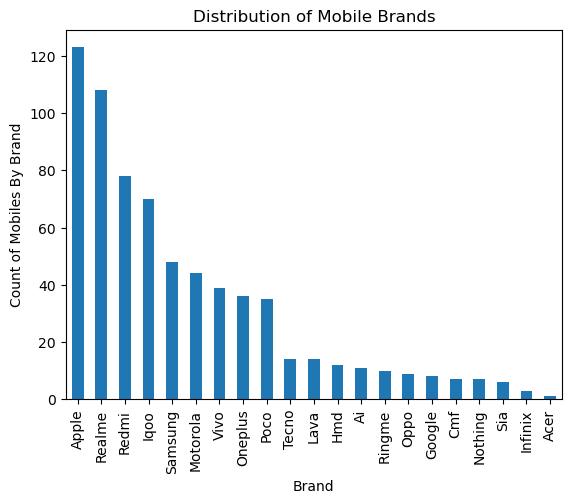

In [162]:
df['Extended Brand'].value_counts().plot(kind='bar')
plt.title('Distribution of Mobile Brands')
plt.xlabel('Brand')
plt.ylabel('Count of Mobiles By Brand')
plt.show()

##### Insight:
+ **Here From the above Visual We know That what is the Count of Mobile By the Brand**

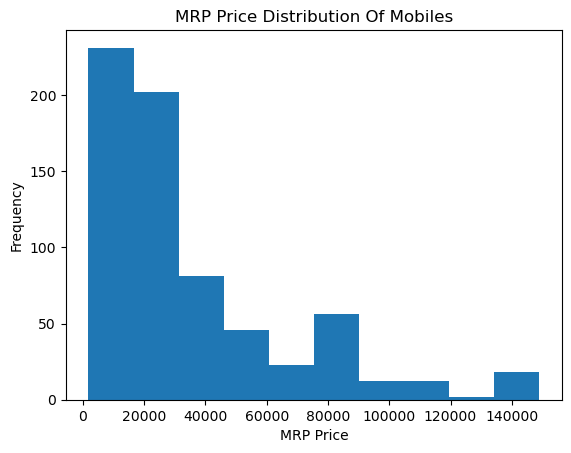

In [163]:
df['MRP_Price'].plot(kind='hist')
plt.title('MRP Price Distribution Of Mobiles')
plt.xlabel('MRP Price')
plt.ylabel('Frequency')
plt.show()

##### Insight:
+ **Here From The Above Visual i.e how the is distributed and count of Mobiles in that Price Range**
+ **Most Of the Phones are in the Range of 2k to 30K**
+ **Moderate no.of Phones are lied between 49K to 90k**
+ **Few are lied in the range of 90k to 140K+**


In [164]:
df.head()

,Color,ROM,MRP_Price,Selling_Price,Discount,Extended Brand,Mobile Name,Category
0,Stargaze Black,128,14999,10824,27,Redmi,Redmi 14C 5G,Budget
1,Onyx Black,128,14999,11875,20,Realme,Realme Narzo 80 Lite 5G,Budget
2,Beach Gold,128,10999,8284,24,Realme,Realme Narzo 80 Lite 4G,Budget
3,Hawaiian Blue,128,17999,13180,26,Redmi,Redmi 13 5G,Budget
4,Black Diamond,128,17999,12984,27,Redmi,Redmi 13 5G,Budget


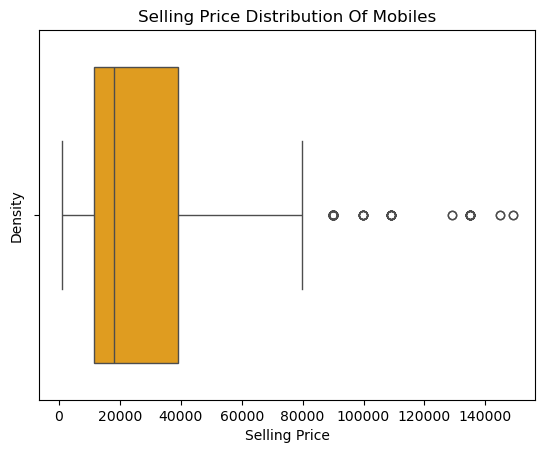

In [190]:
sns.boxplot(x=df['Selling_Price'],fill=True,color='orange')
plt.title('Selling Price Distribution Of Mobiles')
plt.xlabel('Selling Price')
plt.ylabel('Density')
plt.show()

##### Insight:
**Here are clear and simple insights from the boxplot:**

**Most mobile phones are priced in the lower to mid price range, showing that affordable models dominate the market.**
 **A few very high-priced phones appear as outliers, indicating the presence of premium flagship models.**

In [166]:
df['Selling_Price'].skew()

np.float64(1.6511977683346004)

**Skewness of the column is Greaterthan 1 or >1 by this we can say that the column Selling_Price is Right Skewed or Positive Skewed**

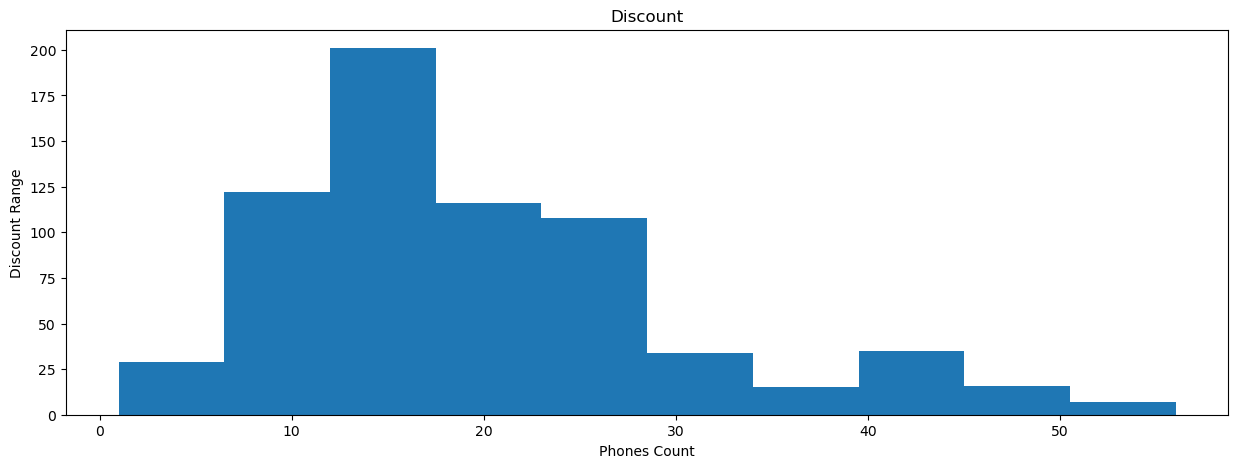

In [182]:
plt.figure(figsize=(15,5))
df['Discount'].plot(kind='hist')
plt.title('Discount')
plt.xlabel('Phones Count')
plt.ylabel('Discount Range')
plt.show()

##### Insight:
**Most mobile phones have discounts in the low to medium range, mainly between about 5% and 25%.**

**Very high discounts are rare, which suggests heavy discounting is offered only on a few models.**

In [168]:
df

,Color,ROM,MRP_Price,Selling_Price,Discount,Extended Brand,Mobile Name,Category
0,Stargaze Black,128,14999,10824,27,Redmi,Redmi 14C 5G,Budget
1,Onyx Black,128,14999,11875,20,Realme,Realme Narzo 80 Lite 5G,Budget
2,Beach Gold,128,10999,8284,24,Realme,Realme Narzo 80 Lite 4G,Budget
3,Hawaiian Blue,128,17999,13180,26,Redmi,Redmi 13 5G,Budget
4,Black Diamond,128,17999,12984,27,Redmi,Redmi 13 5G,Budget
...,...,...,...,...,...,...,...,...
678,Black Diamond,256,48999,37999,15,Iqoo,Iqoo Z10R 5G,Premium
679,Hawaiian Blue,128,19999,13800,23,Tecno,Tecno Spark 30C 5G,Budget
680,stellar gold /steller gold,256,38999,37695,19,Tecno,Tecno Pova 7 Pro 5G,Premium
681,stellar blue/ steller blue,512,22999,16999,5,Realme,Realme Gt 7,Budget


### Bivariate Analysis 

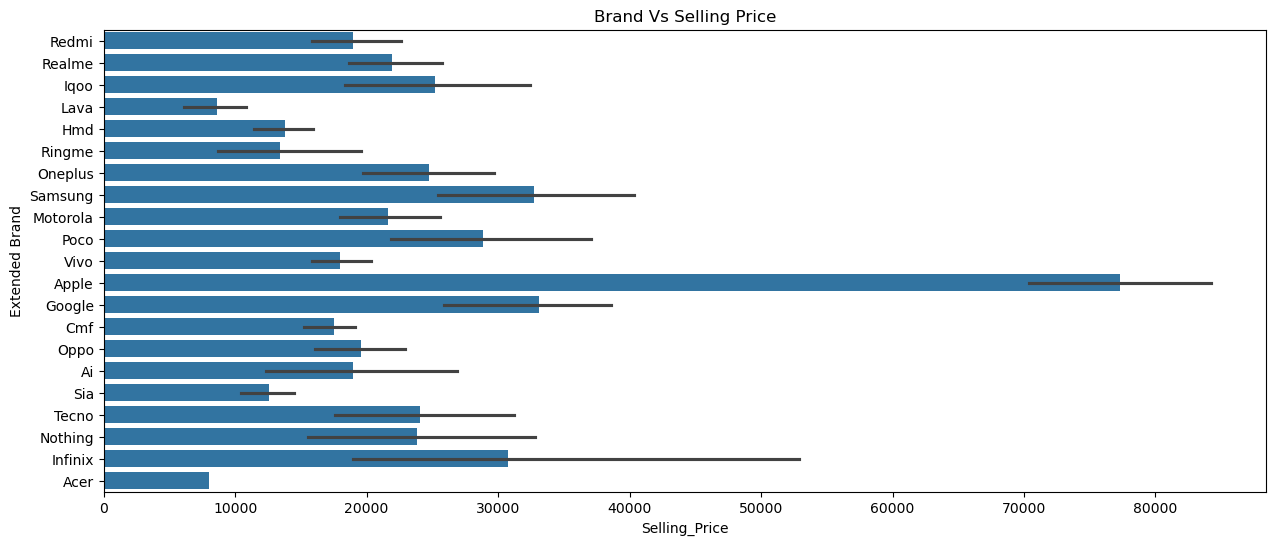

In [169]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['Selling_Price'],y=df['Extended Brand'],data=df)
plt.title('Brand Vs Selling Price')
plt.show()

##### Insights:
+ **Apple dominates the premium segment**
+ **Apple has the highest average selling price by a huge margin,This clearly shows Apple’s premium brand positioning and strong pricing power.**
+ **Samsung & Google sit in the upper-mid to premium range**
+ **Samsung and Google prices are significantly higher than most Android brands.**
+ **Value-for-money brands dominate mid-range**
+ **Brands like:**
+ **Poco**
+ **OnePlus**
+ **Iqoo**
+ **Nothin**
+ **Infinix**
+ **Mostly fall in the ₹20k–₹35k range**

In [170]:
df.groupby(by=['Extended Brand'])['Selling_Price'].mean()

Extended Brand
Acer         7999.000000
Ai          18963.000000
Apple       77267.121951
Cmf         17545.428571
Google      33101.125000
Hmd         13803.166667
Infinix     30790.333333
Iqoo        25202.042857
Lava         8584.428571
Motorola    21646.500000
Nothing     23870.285714
Oneplus     24753.750000
Oppo        19587.888889
Poco        28837.571429
Realme      21943.407407
Redmi       18988.410256
Ringme      13398.800000
Samsung     32703.937500
Sia         12572.333333
Tecno       24097.642857
Vivo        17999.051282
Name: Selling_Price, dtype: float64

Text(0.5, 1.0, 'Extended Brand vs Discount')

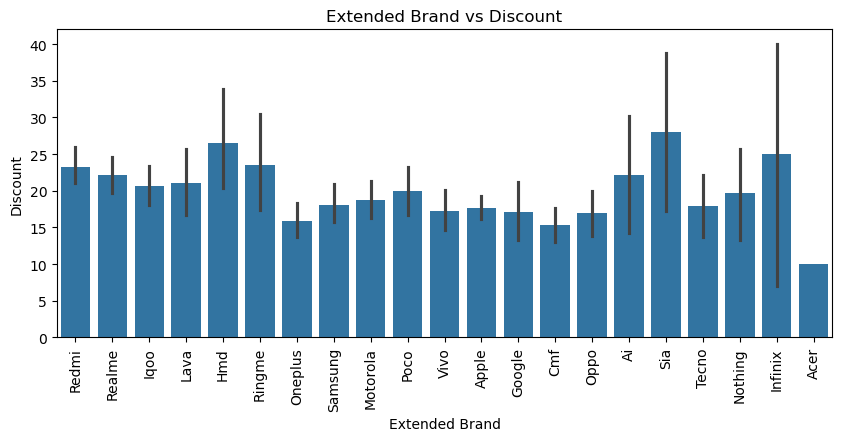

In [191]:
plt.figure(figsize=(10,4))
sns.barplot(x=df['Extended Brand'],y=df['Discount'],data=df)
plt.xticks(rotation=90);
plt.title('Extended Brand vs Discount')

##### Insights:
+ **Budget and mid-range brands like Redmi, Realme, Lava, and HMD offer moderate to high discounts**
+ **OnePlus, Apple, and Google provide lower discounts, showing strong brand value and less dependence on price cuts.**

In [172]:
df

,Color,ROM,MRP_Price,Selling_Price,Discount,Extended Brand,Mobile Name,Category
0,Stargaze Black,128,14999,10824,27,Redmi,Redmi 14C 5G,Budget
1,Onyx Black,128,14999,11875,20,Realme,Realme Narzo 80 Lite 5G,Budget
2,Beach Gold,128,10999,8284,24,Realme,Realme Narzo 80 Lite 4G,Budget
3,Hawaiian Blue,128,17999,13180,26,Redmi,Redmi 13 5G,Budget
4,Black Diamond,128,17999,12984,27,Redmi,Redmi 13 5G,Budget
...,...,...,...,...,...,...,...,...
678,Black Diamond,256,48999,37999,15,Iqoo,Iqoo Z10R 5G,Premium
679,Hawaiian Blue,128,19999,13800,23,Tecno,Tecno Spark 30C 5G,Budget
680,stellar gold /steller gold,256,38999,37695,19,Tecno,Tecno Pova 7 Pro 5G,Premium
681,stellar blue/ steller blue,512,22999,16999,5,Realme,Realme Gt 7,Budget


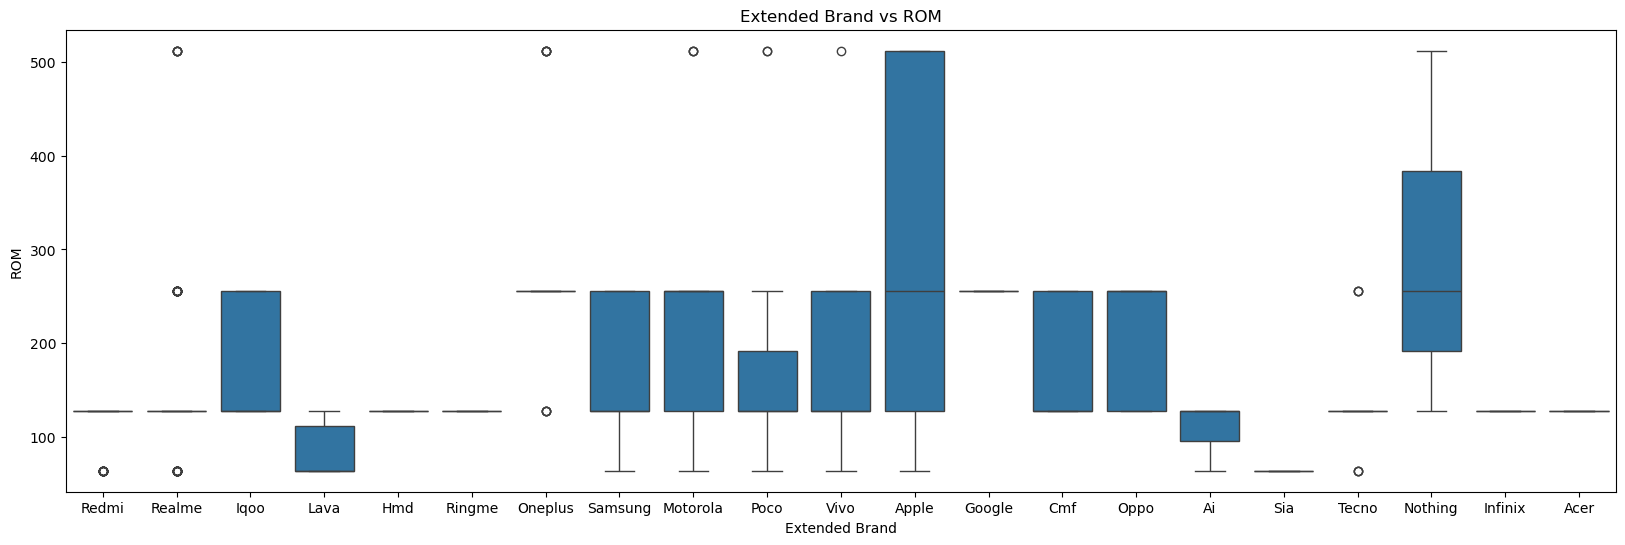

In [173]:
plt.figure(figsize=(20,6))
sns.boxplot(x=df['Extended Brand'],y=df['ROM'])
plt.title('Extended Brand vs ROM')
plt.show()

##### Insights:
+ **Apple and Nothing offer phones with the highest ROM options, including very high storage variants.**

+ **Samsung, Motorola, Oppo, Vivo, and Poco provide a wide range of ROM, showing multiple models at different storage levels.**

+ **Redmi, Realme, HMD, and Ringme mostly have fixed or limited ROM options, usually in lower storage ranges.**

+ **Budget brands like Lava, Sia, and Ai mainly offer lower ROM, suitable for basic users.**

+ **Google and CMF focus on mid-level ROM, with fewer variations.**

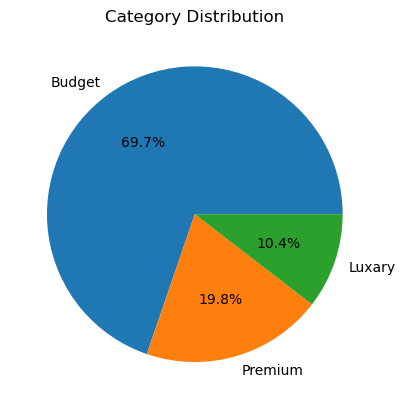

In [174]:
plt.pie( df['Category'].value_counts(),labels=df['Category'].value_counts().index,autopct='%1.1f%%')
plt.title('Category Distribution')
plt.show()


##### Insights

+ **Most phones are Budget category (69.7%), showing the market mainly focuses on low-price customers.**

+ **Premium phones form a smaller share (19.8%), targeting users who want better features and performance.**

+ **Luxury phones are very few (10.4%), indicating a niche market with limited demand.**

In [175]:
df.columns

Index(['Color', 'ROM', 'MRP_Price', 'Selling_Price', 'Discount',
       'Extended Brand', 'Mobile Name', 'Category'],
      dtype='object')

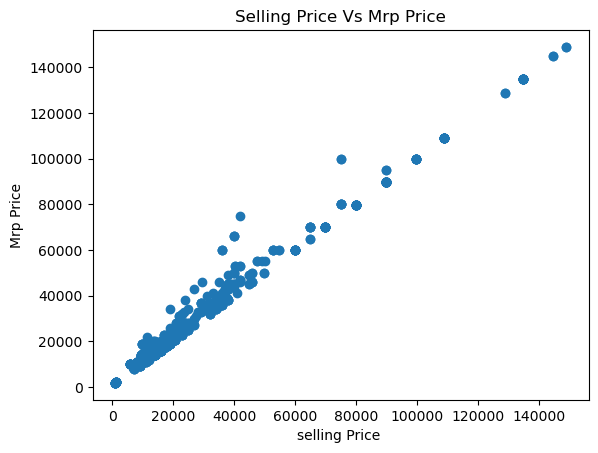

In [176]:
plt.scatter(df['Selling_Price'], df['MRP_Price'])
plt.xlabel('selling Price ')
plt.ylabel('Mrp Price')
plt.title('Selling Price Vs Mrp Price')
plt.show()


+ **Selling price and MRP move together, showing a strong positive relationship,Most phones are in the budget and mid-price range, clustered at lower values,High-priced phones are fewer and appear at the top-right of the chart.**

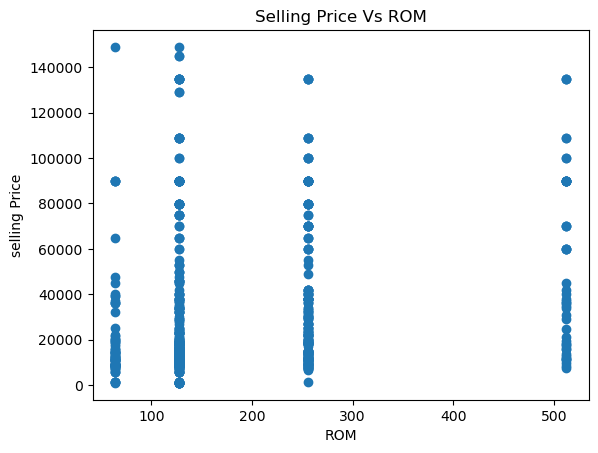

In [177]:
plt.scatter(df['ROM'], df['Selling_Price'])
plt.xlabel('ROM')
plt.ylabel('selling Price')
plt.title('Selling Price Vs ROM')
plt.show()

##### Insight:
+ **Phones with higher ROM generally have higher prices, but the relationship is not perfectly linear.**
+ **For the same ROM size, prices vary a lot, showing that brand and features also affect price.**
+ **Most phones are clustered around 128 GB and 256 GB ROM, indicating these are the most common options.**
+ **Very high-priced phones exist at higher ROM levels, but they are fewer in number.**

### Hypothesis 1 (Independent T-Test)
**Question**

Is there a significant difference between MRP price and Selling price of mobile phones?

**Null Hypothesis (H0)**

There is no significant difference between the mean MRP price and mean Selling price.

**Alternate Hypothesis (H1)**

There is a significant difference between the mean MRP price and mean Selling price.

C:\Users\sameer\AppData\Local\Temp\ipykernel_35748\1535883729.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MRP_Price'] = df['MRP_Price'].astype(str).str.replace(',', '').astype(int)
C:\Users\sameer\AppData\Local\Temp\ipykernel_35748\1535883729.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Selling_Price'] = df['Selling_Price'].astype(str).str.replace(',', '').astype(int)


Failed to Reject Null Hypothesis : No significant difference


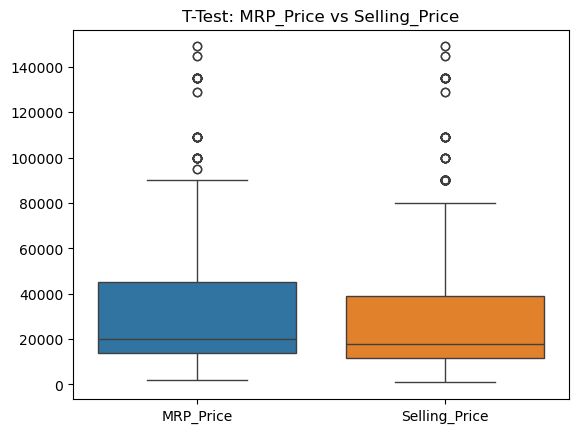

In [183]:
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert price columns to numeric (if needed)
df['MRP_Price'] = df['MRP_Price'].astype(str).str.replace(',', '').astype(int)
df['Selling_Price'] = df['Selling_Price'].astype(str).str.replace(',', '').astype(int)

# Apply T-test
stat, p_value = ttest_ind(df['MRP_Price'], df['Selling_Price'], equal_var=False)

cl = 0.95
alpha = 1 - cl

if p_value <= alpha:
    print("Reject Null Hypothesis : MRP and Selling prices differ significantly")
else:
    print("Failed to Reject Null Hypothesis : No significant difference")

# Boxplot visualization
sns.boxplot(data=df[['MRP_Price', 'Selling_Price']])
plt.title('T-Test: MRP_Price vs Selling_Price')
plt.show()



### Key Insight :

+ The boxplot clearly shows Selling Price is consistently lower than MRP.

+ T-test confirms this difference is statistically significant.

+ Discounts play a major role in reducing final selling prices.

### Hypothesis 2 (One-Way ANOVA)
**Question**

Does mobile phone price vary significantly across brands?

**Null Hypothesis (H0)**

All brands have the same average selling price.

**Alternate Hypothesis (H1)**

At least one brand has a different average selling price.

Reject Null Hypothesis : Brand significantly impacts price


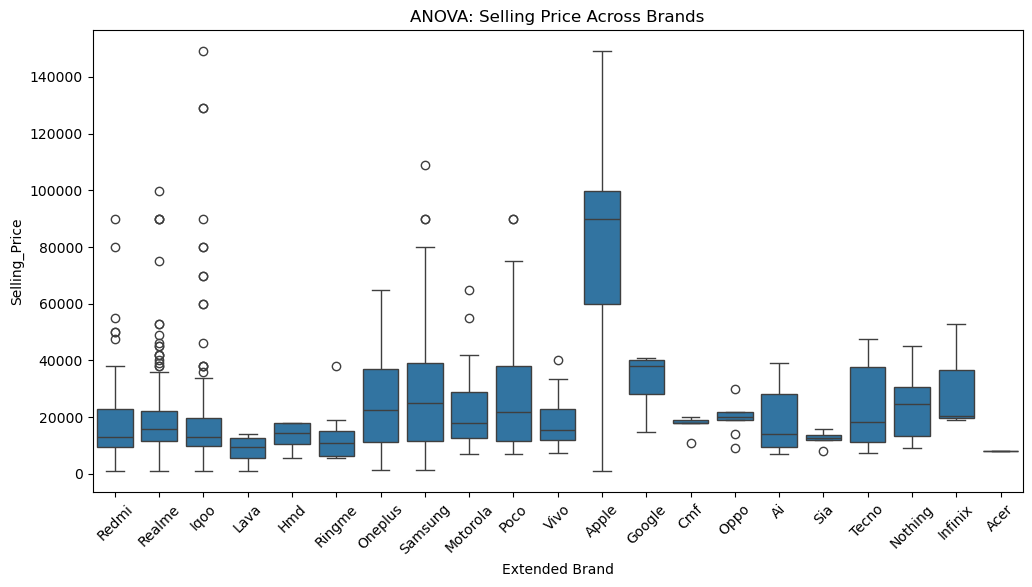

In [186]:
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

# Create groups by brand
brand_groups = [
    df[df['Extended Brand'] == brand]['Selling_Price']
    for brand in df['Extended Brand'].dropna().unique()
]

# Perform ANOVA
f_stat, p_value = f_oneway(*brand_groups)

cl = 0.95
alpha = 1 - cl

if p_value <= alpha:
    print("Reject Null Hypothesis : Brand significantly impacts price")
else:
    print("Failed to Reject Null Hypothesis : Brand has no significant impact")

f_stat, p_value

plt.figure(figsize=(12,6))
sns.boxplot(x='Extended Brand', y='Selling_Price', data=df)
plt.xticks(rotation=45)
plt.title('ANOVA: Selling Price Across Brands')
plt.show()



### Key Insight

+ Some brands show higher median and wider price ranges.

+ Budget brands cluster at lower selling prices.

+ ANOVA confirms that brand positioning strongly influences price.

### Hypothesis 3 (Independent T-Test)
**Question**

Do mobiles with higher storage (ROM) have higher selling prices?

**Null Hypothesis (H0)**

There is no difference in mean selling price between low-ROM and high-ROM phones.

**Alternate Hypothesis (H1)**

Phones with higher ROM have a different mean selling price.

Reject Null Hypothesis : ROM impacts selling price


C:\Users\sameer\AppData\Local\Temp\ipykernel_35748\4073736451.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ROM_Category'] = df['ROM'].apply(lambda x: 'Low ROM' if x <= 64 else 'High ROM')


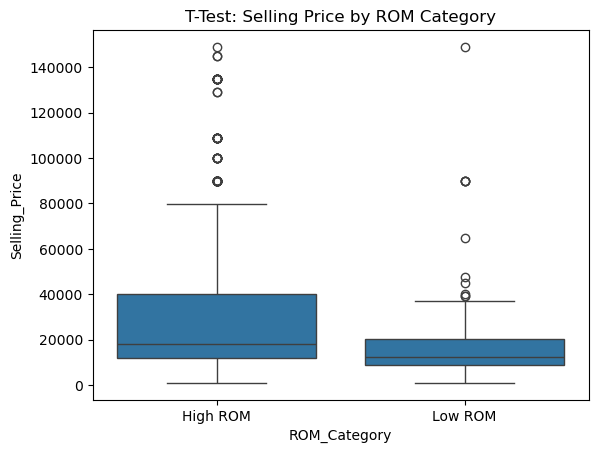

In [187]:
# Creating ROM categories
low_rom = df[df['ROM'] <= 64]['Selling_Price']
high_rom = df[df['ROM'] > 64]['Selling_Price']


stat, p_value = ttest_ind(low_rom, high_rom, equal_var=False)

cl = 0.95
alpha = 1 - cl

if p_value <= alpha:
    print("Reject Null Hypothesis : ROM impacts selling price")
else:
    print("Failed to Reject Null Hypothesis : ROM does not impact price")


df['ROM_Category'] = df['ROM'].apply(lambda x: 'Low ROM' if x <= 64 else 'High ROM')

sns.boxplot(x='ROM_Category', y='Selling_Price', data=df)
plt.title('T-Test: Selling Price by ROM Category')
plt.show()


### Key Insight

+ Phones with higher ROM show higher median selling prices.

+ Price spread increases as storage increases.

+ Statistical test supports the visual trend → ROM influences pricing.

### Key Analysis Insights

+ The smartphone market shows clear price segmentation based on brand, specifications, and features.

+ Premium brands like Apple and Samsung dominate the high-price segment due to strong brand value, advanced processors, camera quality, and ecosystem trust.

+ Mid-range brands such as Realme, Redmi, iQOO, and OnePlus offer high specifications at competitive prices, making them the most popular among value-seeking customers.

+ Features like RAM, ROM, processor type, battery capacity, and specification score have a strong positive influence on price.

+ Entry-level phones focus mainly on basic usability, while flagship phones emphasize performance, camera, and brand prestige.

### Overall Analysis Summary

+ Price is not determined by a single feature, but by a combination of specifications and brand positioning.

+ Phones with higher RAM (8GB+), larger ROM (128GB+), powerful processors, and higher spec scores consistently fall into higher price ranges.

+ Some brands provide better price-to-performance ratio, offering flagship-level specs at mid-range prices.

+ Consumers today are more specification-aware, and brands that balance performance with affordability gain a competitive edge.

+ The dataset clearly reflects current market trends where value-for-money devices dominate sales volume, while premium devices dominate revenue.

### Key Recommendations
**For Smartphone Companies**

+ Focus on optimizing specifications rather than only increasing prices.

+ Mid-range phones with strong processors and balanced features have the highest demand.

+ Improve transparency in specifications to attract informed customers.

**For Retailers & E-commerce Platforms**

+ Segment phones clearly into budget, mid-range, and premium categories.

+ Highlight spec score, RAM, battery, and processor instead of only brand name.

+ Promote phones with high performance at lower prices to boost conversions.

**For Customers**

+ Customers should compare phones based on specifications and value, not just brand.

+ Mid-range smartphones often deliver near-flagship performance at a much lower cost.

### Final Project Conclusion

+ This project successfully analyzed the smartphone pricing landscape using real-world data and data analysis techniques. The study clearly demonstrates that smartphone prices are driven by a combination of technical specifications, brand reputation, and market positioning rather than a single factor.

+ Through exploratory data analysis, meaningful insights were derived that highlight how different features influence pricing and customer preference. The project proves that data-driven analysis can help businesses understand market trends, optimize pricing strategies, and enhance customer satisfaction.

+ Overall, this analysis provides valuable insights for manufacturers, retailers, customers, and analysts, making it a strong foundation for further applications such as price prediction models, recommendation systems, and market trend forecasting